# Содержание

1. [Описание проекта](#start)
2. [Задачи](#tasks)
3. [Загрузка данных](#preprocessing)
4. [Исследовательский анализ данных (EDA)](#preparation_for_analysis)
5. [Модель прогнозирования оттока клиентов](#forecasting_model)
6. [Кластеризация клиентов](#cluster_analysis)
7. [Вывод и базовые рекомендации](#conclusion)  

# Прогнозирование вероятности оттока пользователей для фитнес-центра

<a id="start"></a>
##  Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

<a id="tasks"></a>
##  Задачи

* Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* Проанализировать основные признаки, наиболее сильно влияющие на отток;
* Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

   1) выделить целевые группы клиентов;
   
   2) предложить меры по снижению оттока;
   
   3) определить другие особенности взаимодействия с клиентами.

**«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:**

**Текущие поля в датасете:**

'Churn' — факт оттока в текущем месяце;

***Данные клиента за предыдущий до проверки факта оттока месяц:***

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

***Информация на основе журнала посещений, покупок и информация о текущем статусе а бонемента клиента:***

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<a id="preprocessing"></a>
## Загрузка данных

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import itertools
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [2]:
import warnings
warnings.filterwarnings('ignore')

Загрузим файл /datasets/gym_churn.csv. Изучим данные с помощью метода info(). Выведем первые строки таблицы методом head(), чтобы познакомиться с данными.

In [3]:
def info(data):
# функция выводит информацию по загруженному датефрейму    

    print('--------------Обзор загруженных данных-----------')
    display(data.head(5))
    print()
    data.info()
    print()
    print()
    print('----------Размер датасета---')
    print(data.shape)
    print()
    print('----------Пропуски----------')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print(f'Количество пропусков в столбце {i}:',data[i].isna().sum(),
                  ', что состовляет: {:.2%}'.format(data[i].isna().mean()))
    display(pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm'))
            
            
            
    print()        
    print('----------Дубликаты----------')   
    print('Количество полных дубликатов:', data.duplicated().sum())
    print()

    print('----------Типы данных--------')
    list2={}
    for i in data.columns:
        key = data[i].dtypes
        list2.setdefault(key, [])
        list2[key].append(i)
    for i,k in list2.items():
        print(f'Тип данных {i}: {k}')       

In [4]:
gym=pd.read_csv('/datasets/gym_churn.csv', sep=',')
info(gym)

--------------Обзор загруженных данных-----------


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   floa

,0
gender,0.000000
Near_Location,0.000000
Partner,0.000000
Promo_friends,0.000000
Phone,0.000000
Contract_period,0.000000
Group_visits,0.000000
Age,0.000000
Avg_additional_charges_total,0.000000
Month_to_end_contract,0.000000



----------Дубликаты----------
Количество полных дубликатов: 0

----------Типы данных--------
Тип данных int64: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Lifetime', 'Churn']
Тип данных float64: ['Avg_additional_charges_total', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


**Вывод:**

Был создан датафрейм gym, данные были проверенsы на пропуски и полные дубликаты:
- пропусков и дубликатов нет;
-  во всех колонках соответсвующий тип данных.

<a id="preparation_for_analysis"></a>
## Исследовательский анализ данных (EDA)

**Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())**

В названиях столбцов изменим регистр на нижний, чтобы избежать путаницы.

In [5]:
gym.columns = gym.columns.str.lower()

In [6]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Из данных видим следующее:

- выбросов нет (минимальное и максимальные значиение соответсвуют бинарным показателям 0 и 1);

- средний возраст клиентов 29 лет;

- выручка от прочих услуг фитнес центра по медиане (136,22) по средей (146,94);
- больше половины поситителей приобритают абонемент на 1 месяц, что может свидетельствовать о возможном уходе из зала, ведь если кто-то собирается заниматься продолжительное время выгоднее приобретать абоненменты на длительный срок;

- в среднем клиенты посещают фитнес центр 1,8 раза в неделю;

- большинство клиентов задерживаются в зале не дольше 3 месяцев.

**Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())**

In [7]:
display(gym.groupby('churn')['gender'].agg('count'))

churn
0    2939
1    1061
Name: gender, dtype: int64

Отток составил 1061 человек, осталось 2939 человек.

In [8]:
display(gym.groupby('churn').agg('mean'))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Вывод:

- Распределение по полу примерно равное как для тех кто ушел, так и для тех, кто остался.
- Из тех, кто ушел, 76% жили или работали там, где находился фитнес-центр, а 18% первоначально записывались в рамках акции «приведи друга».
- Признак phone с наличием контактного телефона тоже не отличатся (90%) для обеих групп.
- Заметно, что среди тех, кто ушел, только 26% посещали групповые занятие, а среди тех, кто остался, таких 46%.
- Видим, что ушедшие - это люди с небольшим перодом контракта: 1-2 месяца. Оставшиеся - с бОльшим периодом контракта: 5-6 месяцев.
- Возраст практически одинаковый для обеих групп (26-30 лет).
- Если смотреть на траты на другие услуги фитнес-центра, то видим, что среди ушедших средние траты были примерно 115 у.е, а среди оставшихся - 158 у.е.
- Интересный момент: среди ушедших средний лайфтайм с момента первого обращения в фитнес-центр - меньше месяца. Значит, есть проблемы с удержанием, клиенты не смогли заинтересоваться и спустя месяц ушли.
- Промежуточный вывод - активнее остаются клиенты с более длительным сроком абонемента.
- Средняя частота посещений в неделю за предыдущий месяц у тех, кто остался, больше (2 раза в неделю), чем у тех, кто ушел (1 раз в неделю).

**Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

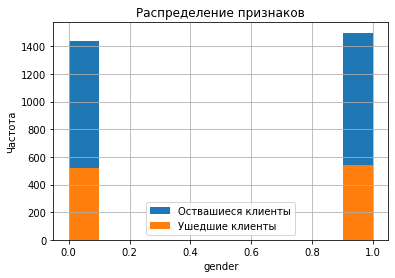

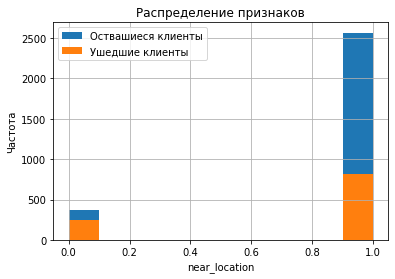

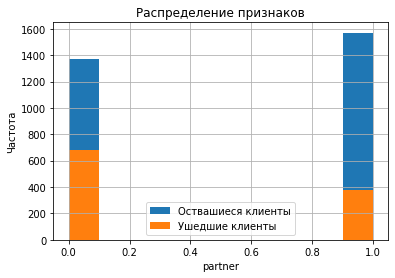

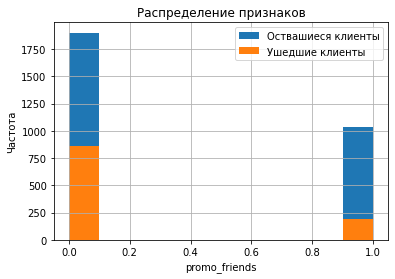

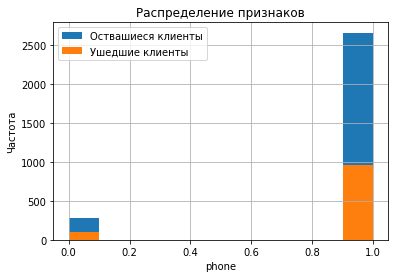

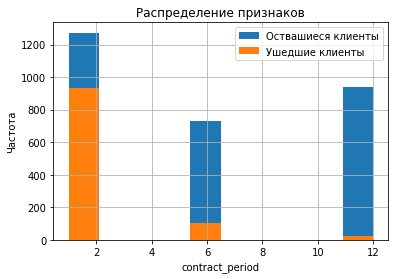

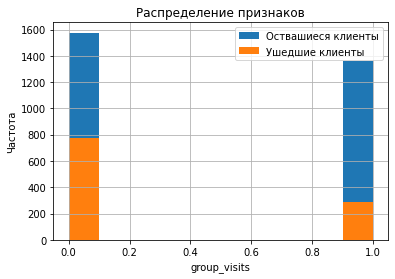

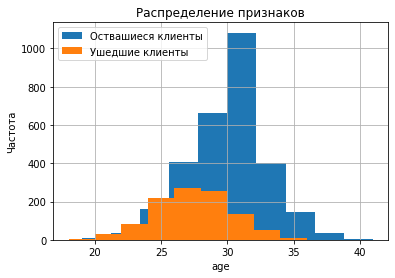

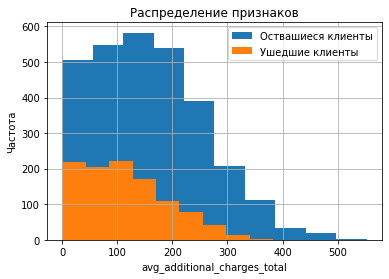

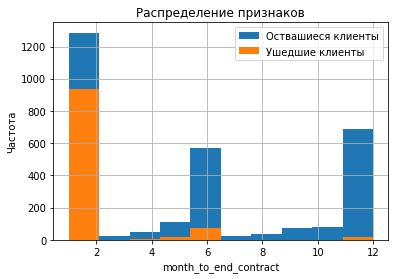

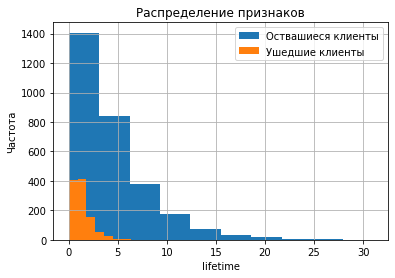

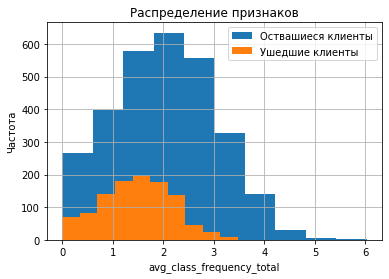

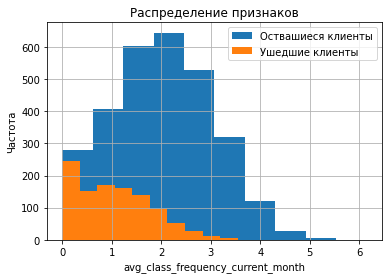

In [9]:
for i in gym.drop('churn', axis=1).columns:
    gym.query('churn==0')[i].hist(bins=10,label='Оствашиеся клиенты' )
    gym.query('churn==1')[i].hist(bins=10, label='Ушедшие клиенты')
  
    plt.title('Распределение признаков')
    
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.legend()
    
    plt.show()

**Выводы из графиков для тех, кто ушел (отток):**

- Распределение мужчин и женщин примерно 50 на 50.
- У большинства ушедших клуб находился рядом с домом или работой.
- Большинство ушедших клиентов - это не сотрудники компаний-партнёров клуба.
- Большинство клиентов из оттока пришли не по акции "приведи друга".
- Практически все клиенты оставили контанктный номер телефона (тех, кто не оставил, примерно 100 человек, или 10%).
- Длительность текущего действующего абонемента для ушедших клиентов в большинстве своём составляет 1 месяц (90%). У оставшихся 10% длительность абонемента 6 месяцев.
- Из числа ушедших клиентов бОльшая часть не ходила на групповые занятия (почти 80%), оставшиеся 20% занятия посещали.
- У большинства ушедших до окончания абонемента оставался 1 месяц.

**Выводы из графиков для тех, кто остался (не попали в отток):**

- Распределение мужчин и женщин примерно 50 на 50.
- У большинства оставшихся клуб находится рядом с домом или работой.
- Чуть больше половины оставшихся клиентов - это сотрудники компаний-партнёров клуба.
- Большая часть оставшихся клиентов (2/3) пришли не по акции "приведи друга".
- Практически все клиенты оставили контанктный номер телефона (тех, кто не оставил, примерно 250 человек).
- Длительность текущего действующего абонемента для ушедших клиентов - 1 месяц(~ 40%), 12 месяцев (~ 35%) и 6 месяцев (~ 25%).
- Из числа оставшихся клиентов бОльшая часть не ходит на групповые занятия (55%), оставшиеся 45% занятия посещают.
- У большего числа оставшихся (~ 43%) до окончания абонемента остается 1 месяц, число тех, у кого осталось 6 и 12 месяцев до конца примерно одинаковое (с 6 месяцами чуть-чуть больше) - их примерно по 20%.

**Постройте матрицу корреляций и отобразите её**

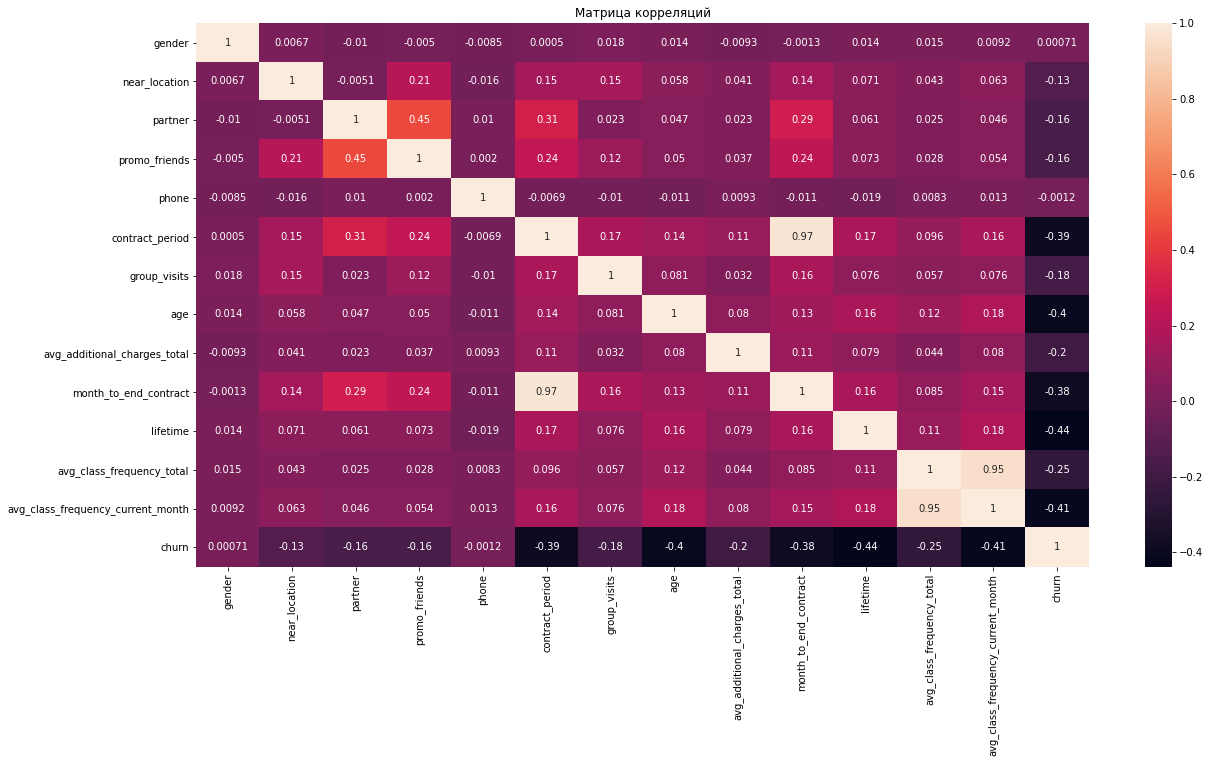

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(gym.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

**Вывод:**

Видим, что длительность текущего действующего абонемента хорошо коррелирует со сроком до окончания текущего действующего абонемента (0.97). Также хорошая корреляция заметна между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (0.95).

Корелляция послабее (0.45) наблюдается между призаком 'Partner' (сотрудник компании-партнёра клуба) и признаком Promo_friends (факт первоначальной записи в рамках акции «приведи друга»). Возможно, коллеги по работе рекомендовали клуб другим своим коллегам.

Также надо отметить очень сильную (выше 0,95) корреляцию пар признаков, которую надо будет учесть в моделях линейной регрессии:

а) 'contract_period' и 'month_to_end_contract'- чем больше период абонемента, тем скорее всего больше месяцев осталось;

б) 'avg_class_frequency_current_month' и 'avg_class_frequency_total' - здесь очень логично, те кто давно уже ходит с постоянным графиком, тот и за последний месяц ходил скорее всего с таким же графиком.

In [11]:
# исключим мультиколлинеарность
gym = gym.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

<a id="forecasting_model"></a>
## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

**Разбейте данные на обучающую и валидационную выборку функцией train_test_split()**

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом**

In [13]:
# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear')

# обучим модель
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

**Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?**

In [14]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test)[:, 1]

# бинарный прогноз
predictions = model.predict(X_test)

# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}' .format(precision_score(y_test, predictions)))
print('Recall: {:.2f}' .format(recall_score(y_test, predictions)))
print('F1: {:.2f}' .format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.88
Precision: 0.76
Recall: 0.77
F1: 0.77
ROC_AUC: 0.95


In [15]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]


# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}' .format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}' .format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}' .format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}' .format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_predictions)))

Accuracy: 0.90
Precision: 0.80
Recall: 0.77
F1: 0.79
ROC_AUC: 0.85


Из двух моделей лучше себя показала модель, построенная способом случайного леса.

**Метрики лучшей модели:**

- Accuracy: точность прогнозирования 0.90
- Precision: доля правильных ответов в пределах класса 0.80
- Recall: количесто исстино положительных результатов 0.77
- F1: обобщеная оценка метрик Precision и Recall 0.79
- ROC_AUC: 0.85 показатель говорит о том, что модель очень точно производит бинарную классификацию объектов

Результаты оценки модели, разными метриками, дали высокие результаты, что свидетельствует о возможности использования её в дальнейшией аналитической работе.

<a id="cluster_analysis"></a>
## Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов).

**Стандартизируйте данные**

In [16]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

**Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить?**

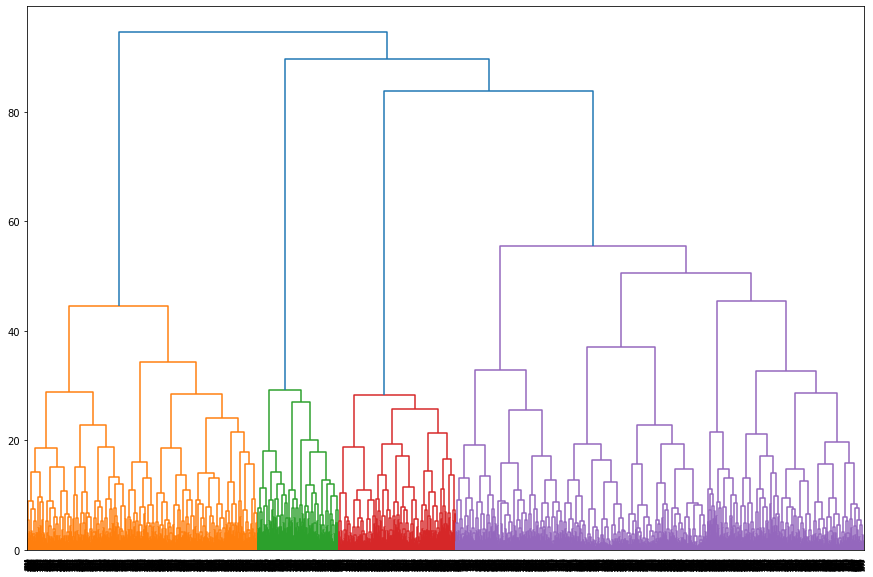

In [17]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании полученного графика можно выделить 4 кластера. Так как 4 кластер - довольно объёмный, разделим выборку на 5 кластеров. После оценки оптимального числа кластеров можно запустить более быстрый алгоритм K-Means.

**Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта)**

In [18]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

**Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?**

In [19]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby('cluster_km').agg('mean')

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


**После разделения на 5 кластеров можно выявить следующие закономерности:**

1. В 0 кластере собраны клиенты, которые живут близко к клубу и пришли по акции друзей. Большинство - это сотрудники компании-партнёра клуба. В клуб они ходят около 4 месяцев, на дополнительные услуги тратят довольно много (160 у.е.), а до прекращения контракта у них осталось ~ 10 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю.

2. В 1 кластере собраны клиенты, которые также пришли по акции друзей, живут недалеко от клуба и ходят на групповые занятия. Отток таких клиентов доволько не самый большой, ~26%.

3. Во 2 кластере собраны клиенты, которые живут далеко от клуба, пришли не по акции друзей, с наименьшей активностью посещают групповые занятия. Средний возраст - 28 лет, на дополнительные услуги тратят около 135 у.е.), а до прекращения контракта у них осталось ~ 2 месяца. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю. Отток таких клиентов достаточно большой, ~44%.

4. В 3 кластере собраны клиенты, которые живут/работают около клуба. Большинство - это не сотрудники компании-партнёра клуба и пришли не по акции друзей. Они не часто посещают групповые занятия, меньше всех тратят на доп. услуги в клубе (~131 у.е.), у них скоро закончится контракт (осталось около 2 месяцев), при этом они сами недавно начали заниматься в клубе. Отток таких клиентов большой, ~51%.

5. В 4 кластере собраны клиенты, которые живут  довольно близко к клубу, третья часть клиентов - сотрудники компании-партнёра клуба. До окончания контракта у них ~ 2,5 месяца, отток таких клиенов маленький, примерно 7%.

**Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?**

In [20]:
features = gym.groupby('cluster_km').agg('mean').reset_index()
features

,cluster_km,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
0,0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


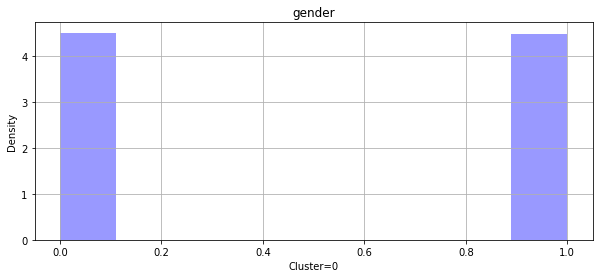

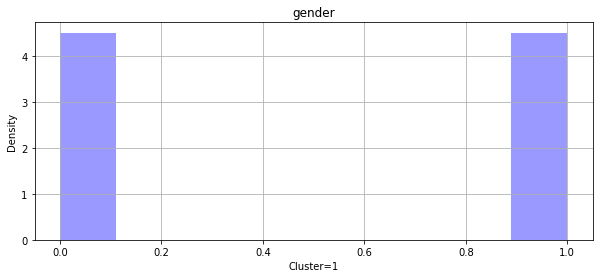

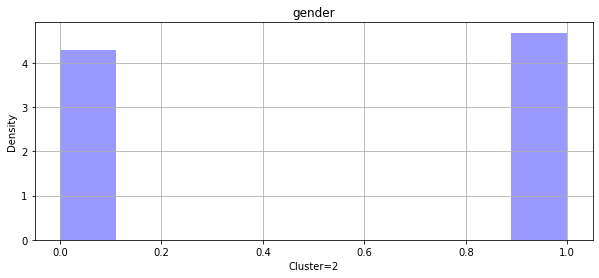

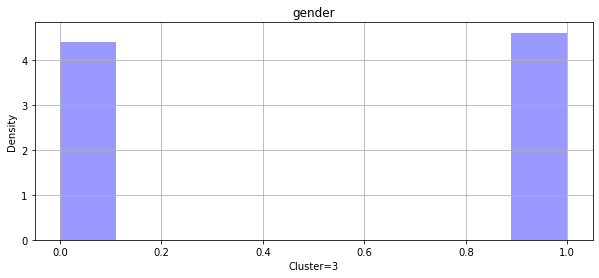

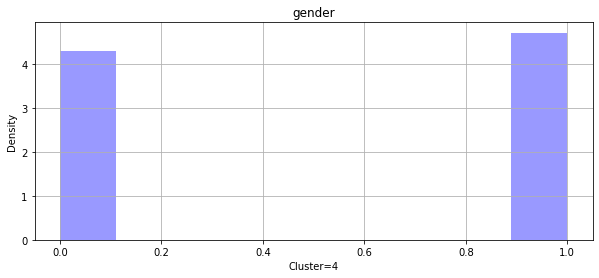

In [21]:
column = 'gender'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

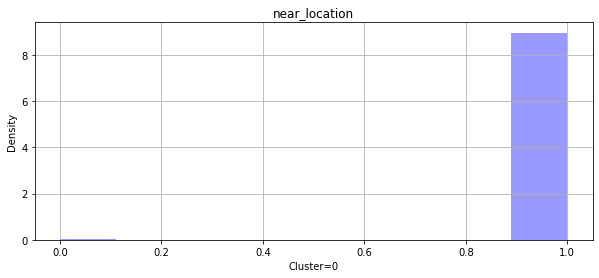

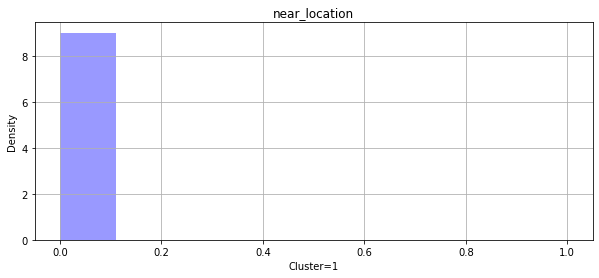

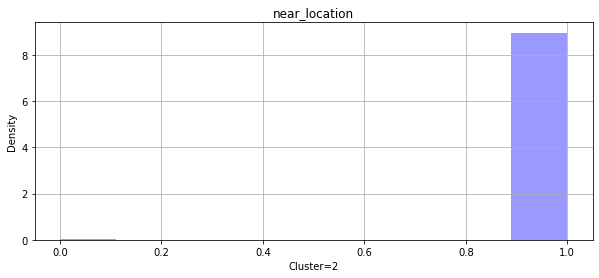

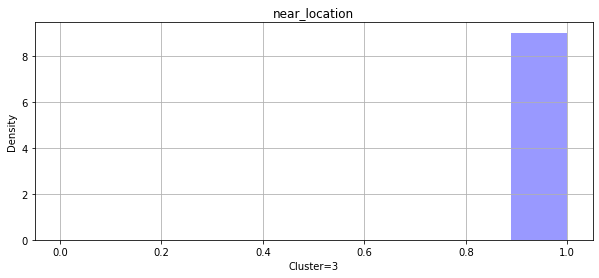

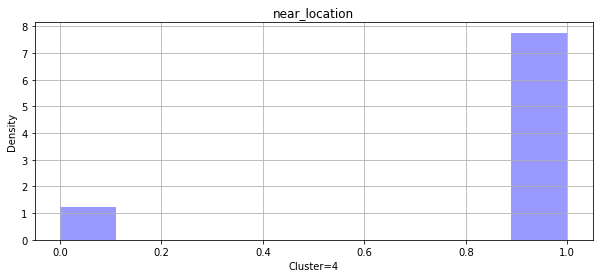

In [22]:
column = 'near_location'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

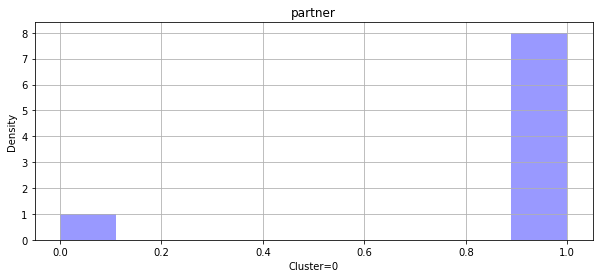

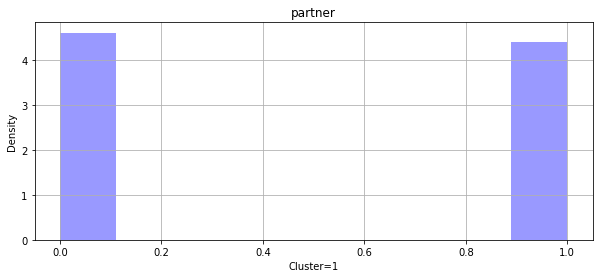

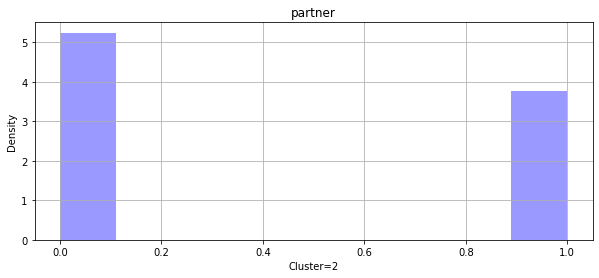

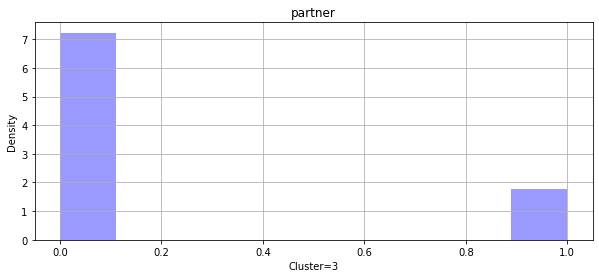

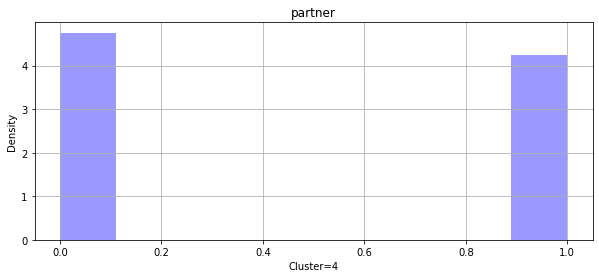

In [23]:
column = 'partner'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

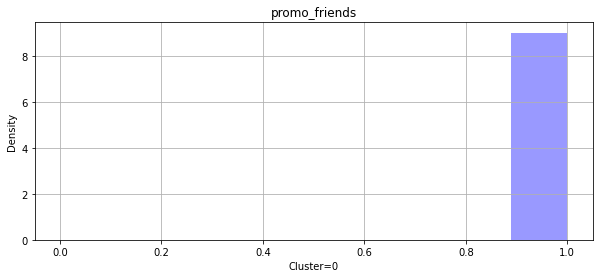

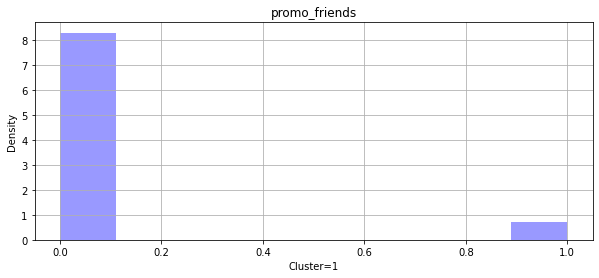

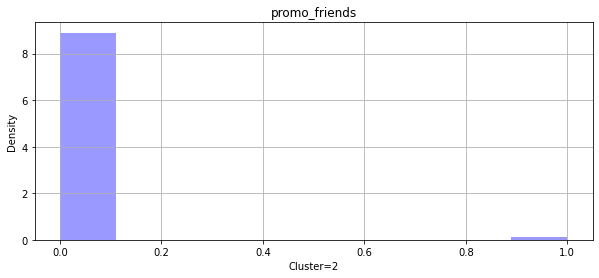

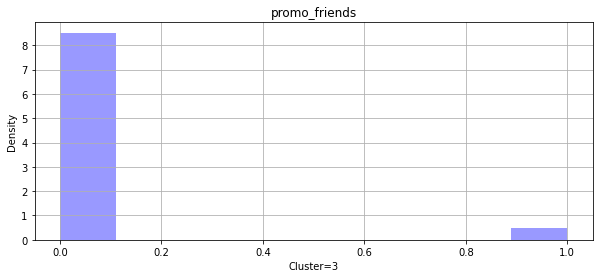

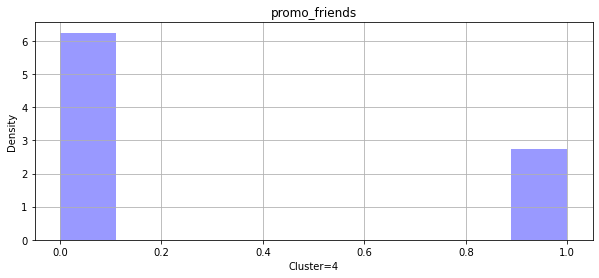

In [24]:
column = 'promo_friends'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

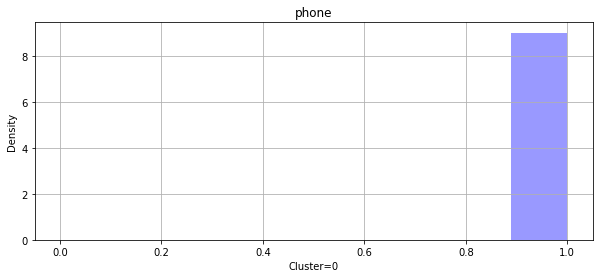

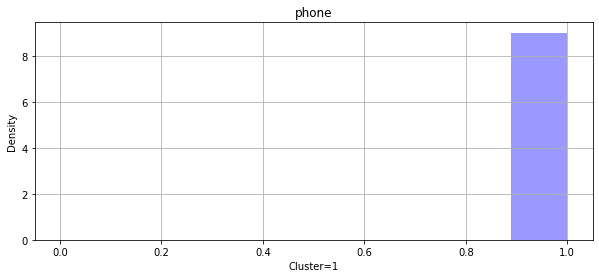

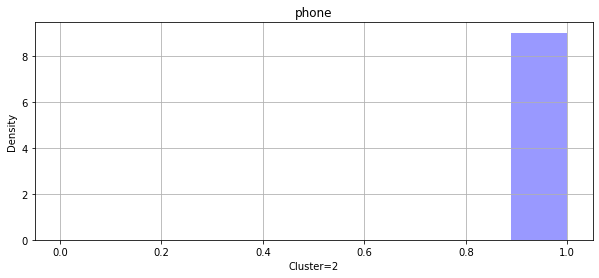

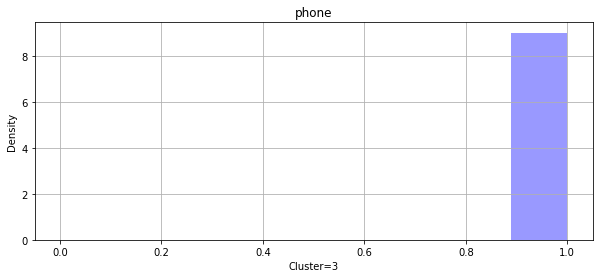

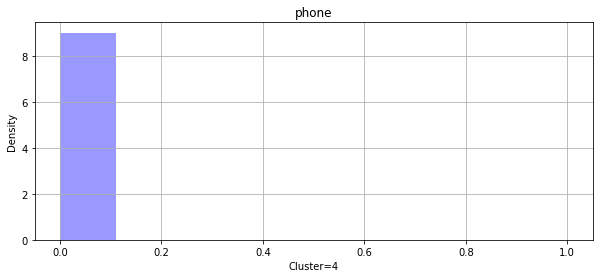

In [25]:
column = 'phone'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

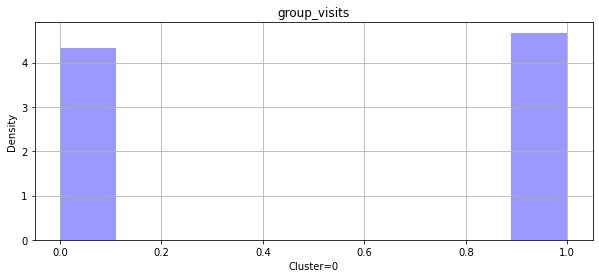

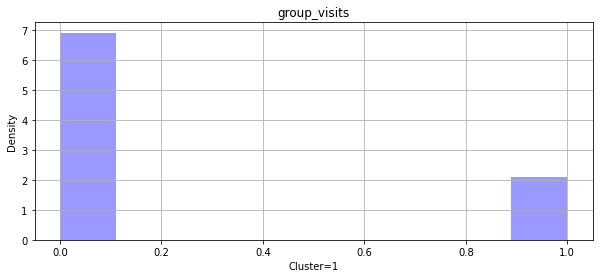

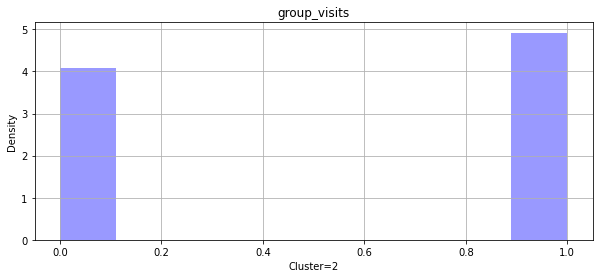

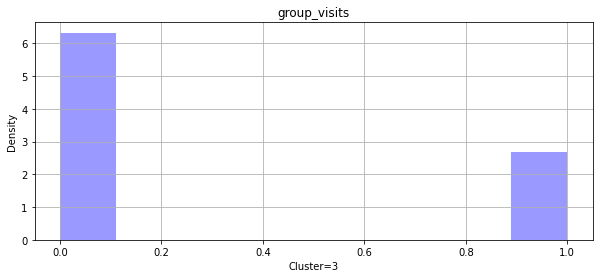

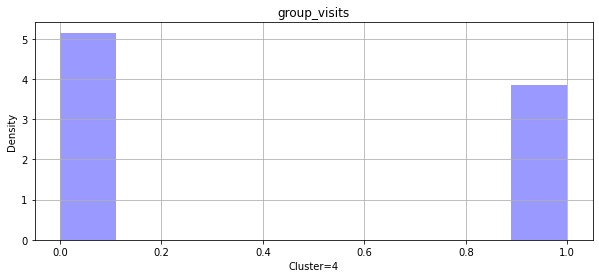

In [26]:
column = 'group_visits'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

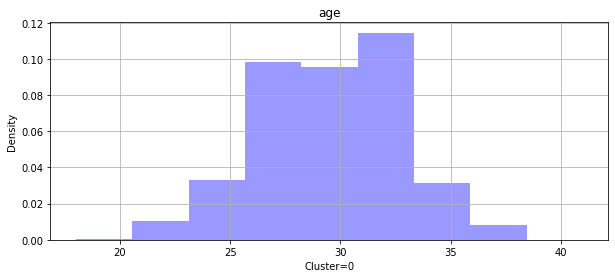

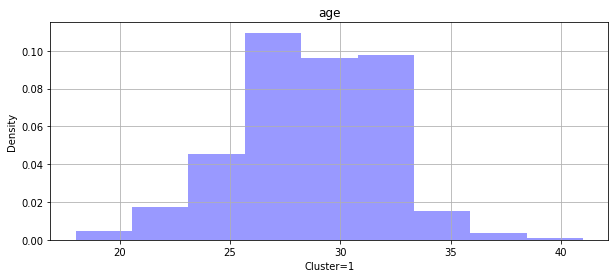

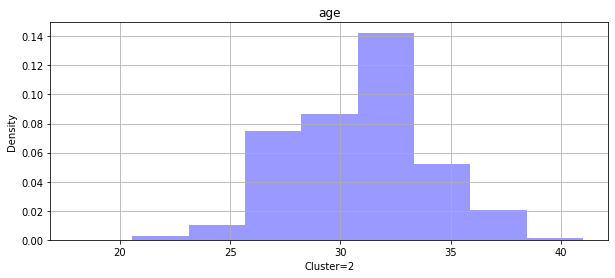

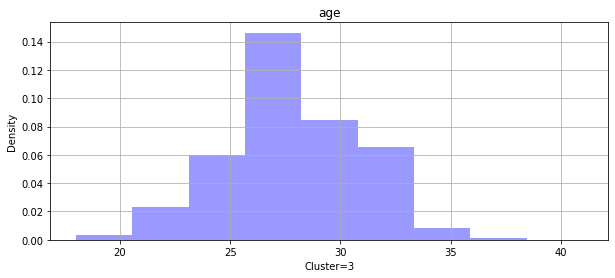

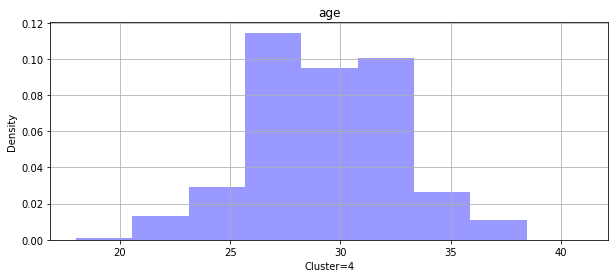

In [27]:
column = 'age'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

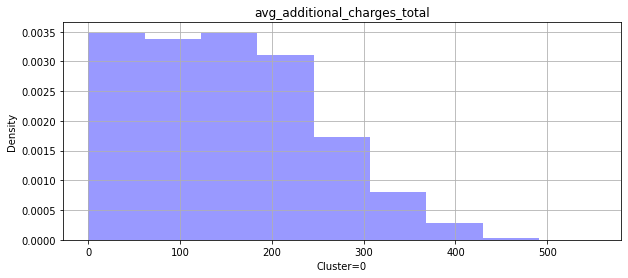

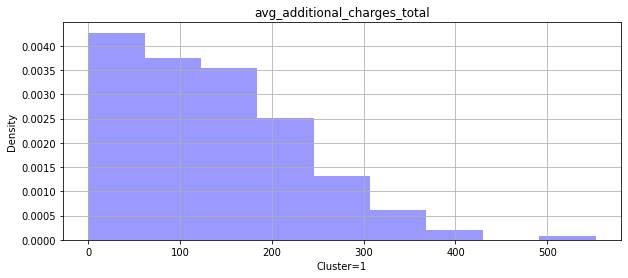

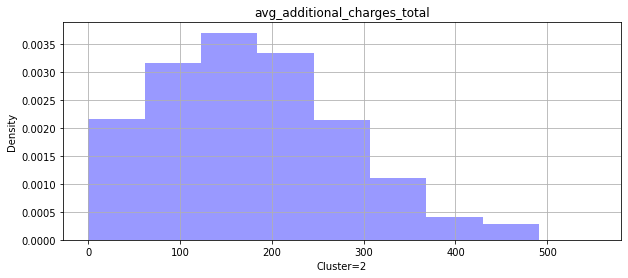

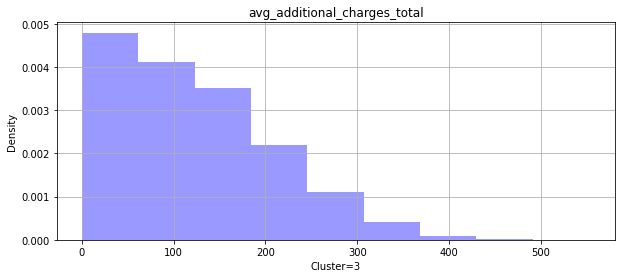

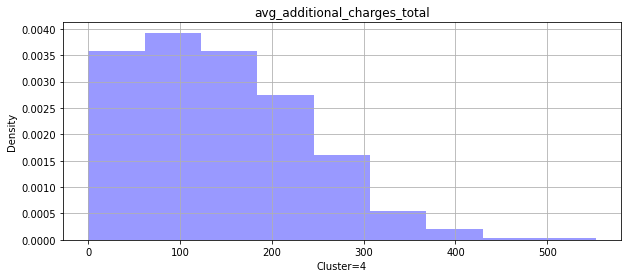

In [28]:
column = 'avg_additional_charges_total'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

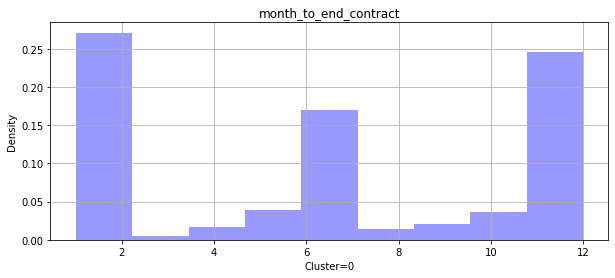

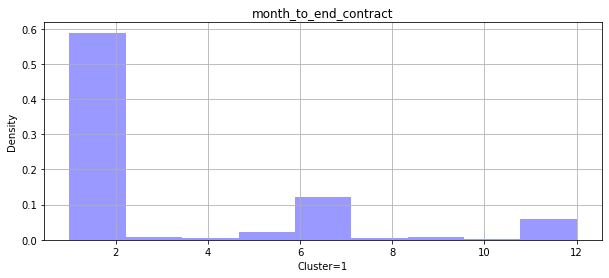

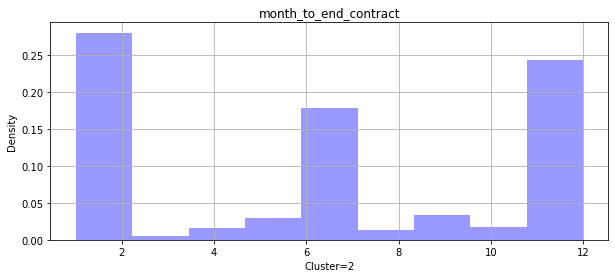

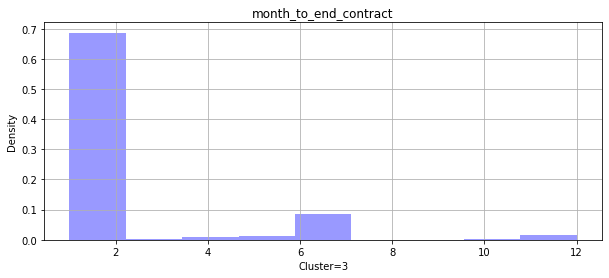

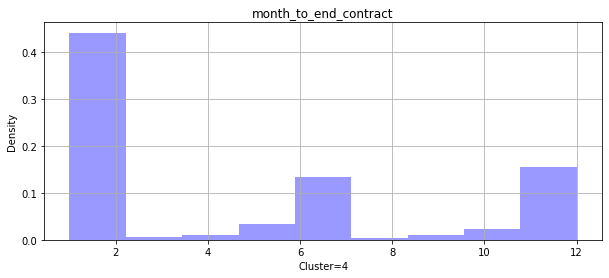

In [29]:
column = 'month_to_end_contract'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

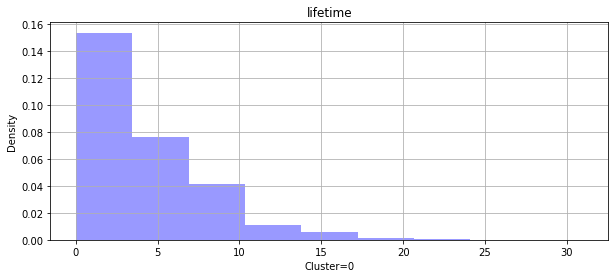

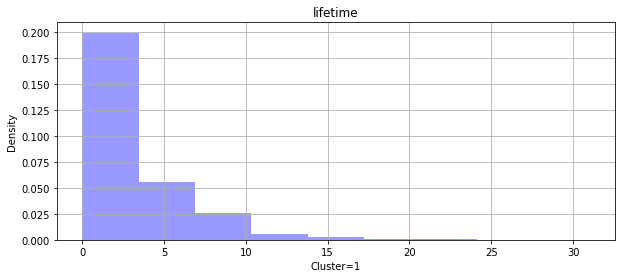

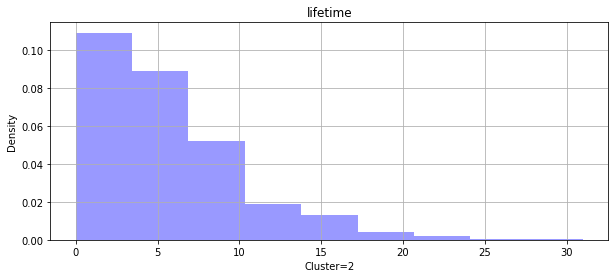

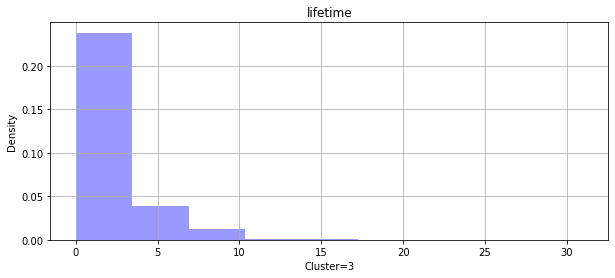

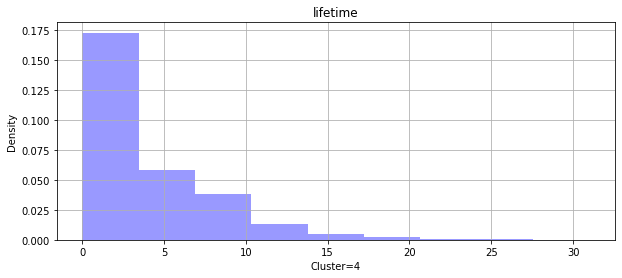

In [30]:
column = 'lifetime'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

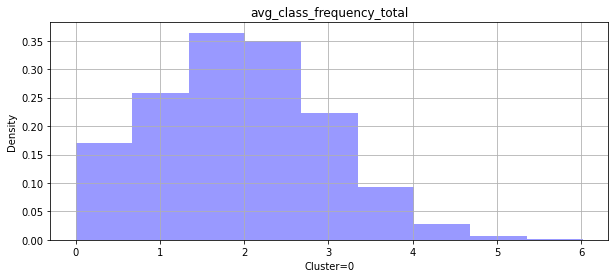

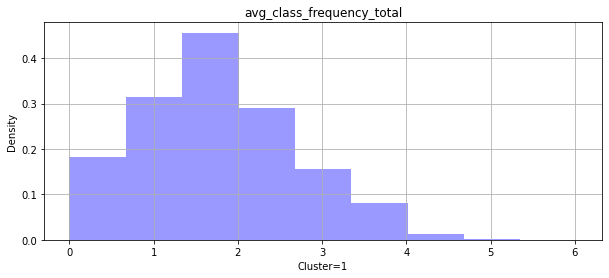

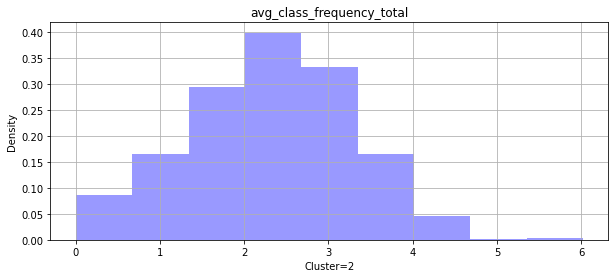

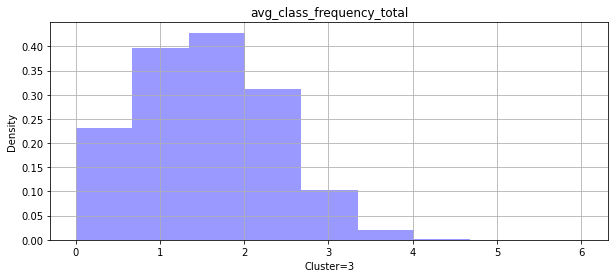

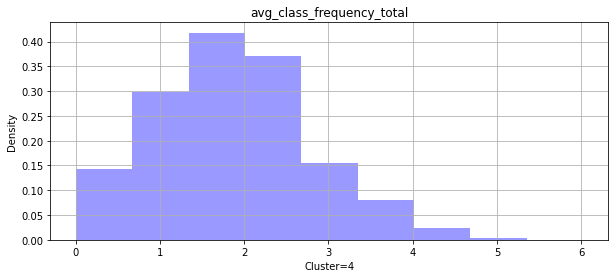

In [31]:
column = 'avg_class_frequency_total'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

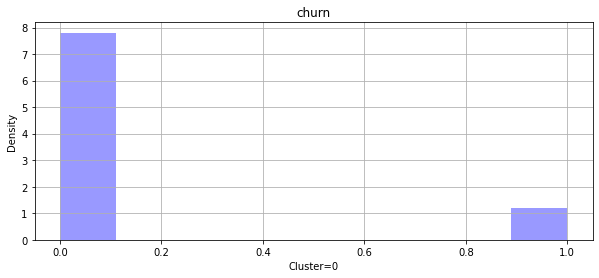

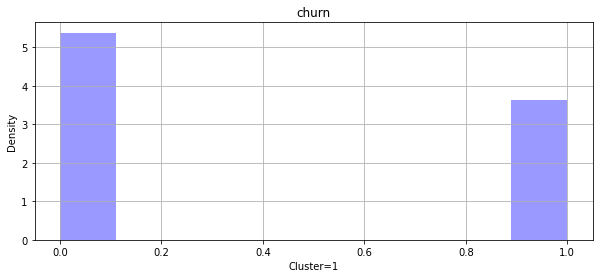

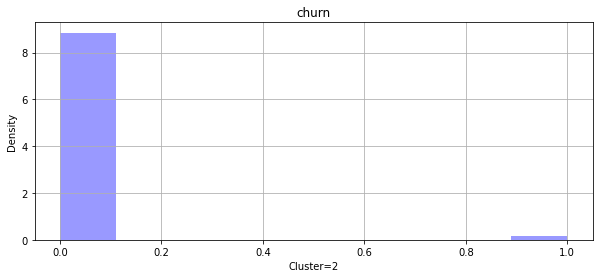

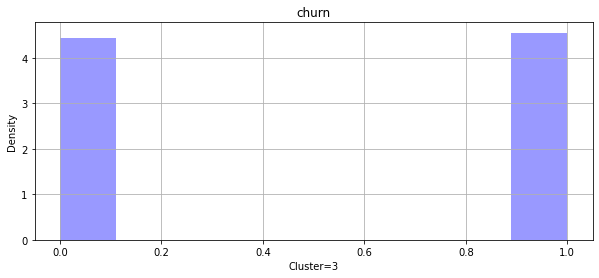

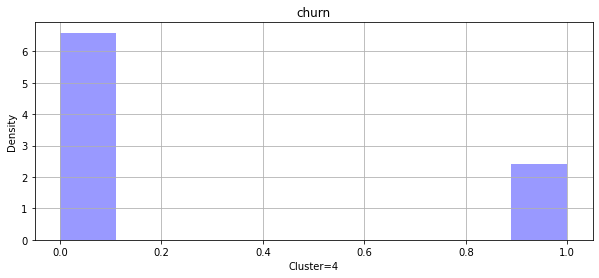

In [32]:
column = 'churn'
min_value = min(gym[column])
max_value = max(gym[column])
bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм
    
for j in sorted(gym['cluster_km'].unique()):
    df_cluster = gym[gym['cluster_km'] == j]
    plt.figure(figsize =(10, 4))
    sns.distplot(df_cluster[column], kde=False, color="b", norm_hist=True, bins = bins_range)
    plt.ylabel('Density')
    plt.xlabel('Cluster='+ str(j))
    plt.title(column)
    plt.grid()
    plt.show()

***Признак 'gender' (Пол):***

Распределение по полу во всех кластерах практически равное. В кластере 2 и 4 один пол(1) немного превалирует над вторым (на 50-100 человек).

***Признак 'Near_Location' (проживание или работа в районе, где находится фитнес-центр):***

В кластерах 0, 1, 3, 4 клиенты проживают или работают в районе, где находится фитнес-ценр. Кластер 2 содержит клиентов, которые живут в других районах, то есть, дальше от центра.

***Признак 'Partner' (сотрудник компании-партнёра клуба):***

В кластерах 0 и 4 большая часть клиентов (80%) - сотрудники компании-партнёра клуба. В кластерах 1 и 3 почти половина клиентов - это сотрудники компании-партнёра клуба. В кластере 2 сосредоточились клиенты, в большинстве своём не являющиеся сотрудниками партнеров клуба (таких ~ 70%).

***Признак 'Promo_friends' (факт первоначальной записи в рамках акции «приведи друга»):***

В кластерах 1 и 3 содержится информация о клиентах, которые в большинстве своем пришли в клуб не по акции. В кластере 0 и 4 находятся клиенты, пришедшие по акции «приведи друга».

***Признак 'Phone' (наличие контактного телефона):***

Во всех кластерах, кроме 1, у клиентов есть оставленный номер телефона.

***Признак 'Group_visits' (факт посещения групповых занятий):***

Половина клиентов из кластеров 0, 2 посешала групповые занятия, а вторая половина - не посешала. Большинство клиентов из кластера 1, 3, 4 не ходили на групповые занятия.

***Признак 'Age' (возраст):***

Во всех кластерах возраст распределен равномеро и находится в районе 28-30 лет.

***Признак 'Avg_additional_charges_total' (суммарная выручка от других услуг фитнес-центра):***

Чуть больше трат замечено в кластерах 0 и 4 (среднее в районе 160 у.е.), меньше всего трат в кластерах 2 и 3 (среднее - 131-135 у.е.).

***Признак 'Month_to_end_contract' (срок до окончания текущего действующего абонемента)***

Меньше всего времении до окончания контракта осталось у клиентов из кластера 3(около 2 месяцев), больше всего времени есть у калстеров 0 и 1 (около 10 и 4 месяцев соответсвенно).

***Признак 'Lifetime' (время с момента первого обращения в фитнес-центр):***

Среднее время с момента первого обращения в фитнес-центр у кластеров 0 и 4 составляет около 5 месяцев, у клиентов из кластера 3 это значение меньше - около 2,5 месяцев.

***Признак 'Avg_class_frequency_total' (средняя частота посещений в неделю за все время с начала действия абонемента)***

Самая высокая средняя частота посещений в неделю у кластера 4 (почти 3 раза внеделю), самая низкая - у кластера 3.

***Признак 'Churn' (факт оттока в текущем месяце):***

В 0 и 4 кластерах собраны клиенты с меньшим оттоком, во 2 и 3 кластерах средний отток значительно больше.

**Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?**

In [33]:
outflow_parts = gym.query('churn==1').groupby('cluster_km')['churn'].count() / gym.query('churn==1')['churn'].count()
outflow_parts

cluster_km
0    0.125353
1    0.211122
2    0.014138
3    0.552309
4    0.097078
Name: churn, dtype: float64

**Вывод:**

Cамый большой отток 55.2 % из 3 кластера. А также самый маленький отток из 4 (9.7%) и 2 (1.4 %) кластеров. Как выясняется загадочные клиенты из 1 кластера, которые не оставляют телефона, по большей части, тоже склонны продолжать ходить в фитнес. В 1 кластере, клиенты живут неблизко и ходят мало (1 раз в неделю, потому что живут неблизко) отток существенный - 21,1%.

<a id="conclusion"></a>
## Выводы и базовые рекомендации по работе с клиентами

***В ходе исследования получены следующие результаты:***

- выбросы отсутсвуют (минимальное и максимальные значиение соответсвуют бинарным показателям 0 и 1),
- средний возраст клиентов 29 лет,
- выручка от прочих услуг фитнес центра по медиане (136,22) по средей (146,94)
- больше половины поситителей приобритают абонемент на 1 месяц, что может свидетельствовать о возможном уходе из зала, ведь если кто-то собирается заниматься продолжительное время выгоднее приобретать абоненменты на длительный срок.
- в среднем клиенты посещают фитнес центр 1,8 раза в неделю,
- большинство клиентов задерживаются в зале не дольше 3 месяцев.

***На основании матрицы корреляции установлено следующее:***

Длительность текущего действующего абонемента хорошо коррелирует со сроком до окончания текущего действующего абонемента (0.97). Также хорошая корреляция заметна между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (0.95).

Корелляция послабее (0.45) наблюдается между призаком 'Partner' (сотрудник компании-партнёра клуба) и признаком Promo_friends (факт первоначальной записи в рамках акции «приведи друга»). Возможно, коллеги по работе рекомендовали клуб другим своим коллегам.

Создали модель , построенную способом случайного леса.

***Метрики лучшей модели:***

- Accuracy: точность прогнозирования 0.90
- Precision: доля правильных ответов в пределах класса 0.80
- Recall: количесто исстино положительных результатов 0.77
- F1: обобщеная оценка метрик Precision и Recall 0.79
- ROC_AUC: 0.85 показатель говорит о том, что модель очень точно производит бинарную классификацию объектов

Результаты оценки модели, разными метриками, дали высокие результаты, что свидетельствует о возможности использования её в дальнейшией аналитеческой работе.

При определение количество кластеров взяли количество кластеров равное 5, из ходя из условия, хотя судя по дендограмме можно было разбить на 4 кластера.

***Сформированы типичные портреты клиентов:***

1 группа - Клиенты с малым оттоком (13%), живут или работают около клуба, большинство пришло от компании-партнера, пришли по рекомендации друзей и акции "Приведи друга" (то есть, возможно, кто-то занимается коллективно, а вместе, как правило, веселее), с умеренной частотностью посещают групповые занятия (50%), довольно прилично в среднем тратят на дополнительные услуги (152 у.е.), довольно долго являются членами клуба (4 месяца), которые живут близко к клубу, пришли не по акции друзей, со средней активностью посещают групповые занятия, а до прекращения контракта у них осталось ~ 6 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю.

2 группа - Клиенты с довольно большим оттоком (40%), живут не в том районе, где находится клуб (то есть, им требуется время на дорогу), пришли сами, не по акции "Приведи друга", и почти не ходят на групповые занятия, в клубе состоят в среднем 3 месяца.

3 группа - Клиенты с большим оттоком (50%), большинство клиентов пришло сами, не по акции "Приведи друга", мало посещают групповые занятия (23%), немного тратят на доп. услуги в клубе (~124 у.е.), у них скоро закончится контракт (осталось 2 месяца), при этом они сами недавно начали заниматься в клубе (около 2 месяцев).

Проанализированы основные признаки, наиболее сильно влияющие на отток. Это признак 'Near_Location' (проживание или работа в районе, где находится фитнес-центр), признак 'Promo_friends' (факт первоначальной записи в рамках акции «приведи друга»), признак 'Group_visits' (факт посещения групповых занятий) и признак 'Lifetime' (время с момента первого обращения в фитнес-центр).

***Выводы на основании этих признаков:***

1. Если клиент стал реже ходить на групповые тренировки, то есть большой шанс на отток клиента.
2. Если клиент живет далеко, и ему требуется время на дорогу, то вероятность оттока выше, на удержание таких клиентов следует направить больше усилий.
3. Если клиент пришел сам по себе, не по акции "Приведи друга", то есть шанс, что он уйдет. Таких клиентов следует заинтересовать групповыми занятиями, так как коллективный спорт и новые знакомства стимулируют клиентов чаще и дольше ходить в фитнес-клубы, так как происходит завязывание и укрепление новых социальных связей.
4. Те, кто в клуб пришел недавно, могут остаться незаинтересованными и в скором времени покинуть клуб, поэтому на "свежих" клиентов нужно направить больше усилий по удержанию, так как атмосфера клуба, обстановка и персонал для них новы, нужно в первое время окружить их бОльшим вниманием и заботой, чтобы клиент почувствовал себя комфортно и привык к новому месту.

***Примеры реализации принципов взаимодействия с клиентами и их удержания в виде маркетинговых действий:***

1. Взаимодействие в соцсетях: активное ведение страниц клуба в соцсетях и продвижение. Создать атмосферу, чтобы клиенты ощущали чувство принадлежности к сообществу клуба.
2. Улучшение и поддержание интерьера клуба и работоспособности тренажеров, чтобы клиентам было так же комфортно заниматься в нем, как раньше.
3. Проведение коллективных активностей в клубе (бесплатные тренировки по субботам, различные мероприятия после занятий или по вечерам; организация специальных фитнес-мероприятий).
4. Индивидуальный подход к клиентам (заинтересованность их успехами, предложение советов и помощи, чтобы их поддержать). Так клиенты будут знать, что они небезразличны.